# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv("base_tratada.csv")
data.head()


,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False


In [25]:
X = data.drop(columns=['mau'])  # Variáveis explicativas
y = data['mau'].astype(int)     # Variável resposta como numérica
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(f"Treinamento: {X_train.shape}, {y_train.shape}")
print(f"Teste: {X_test.shape}, {y_test.shape}")

Treinamento: (11655, 28), (11655,)
Teste: (4995, 28), (4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

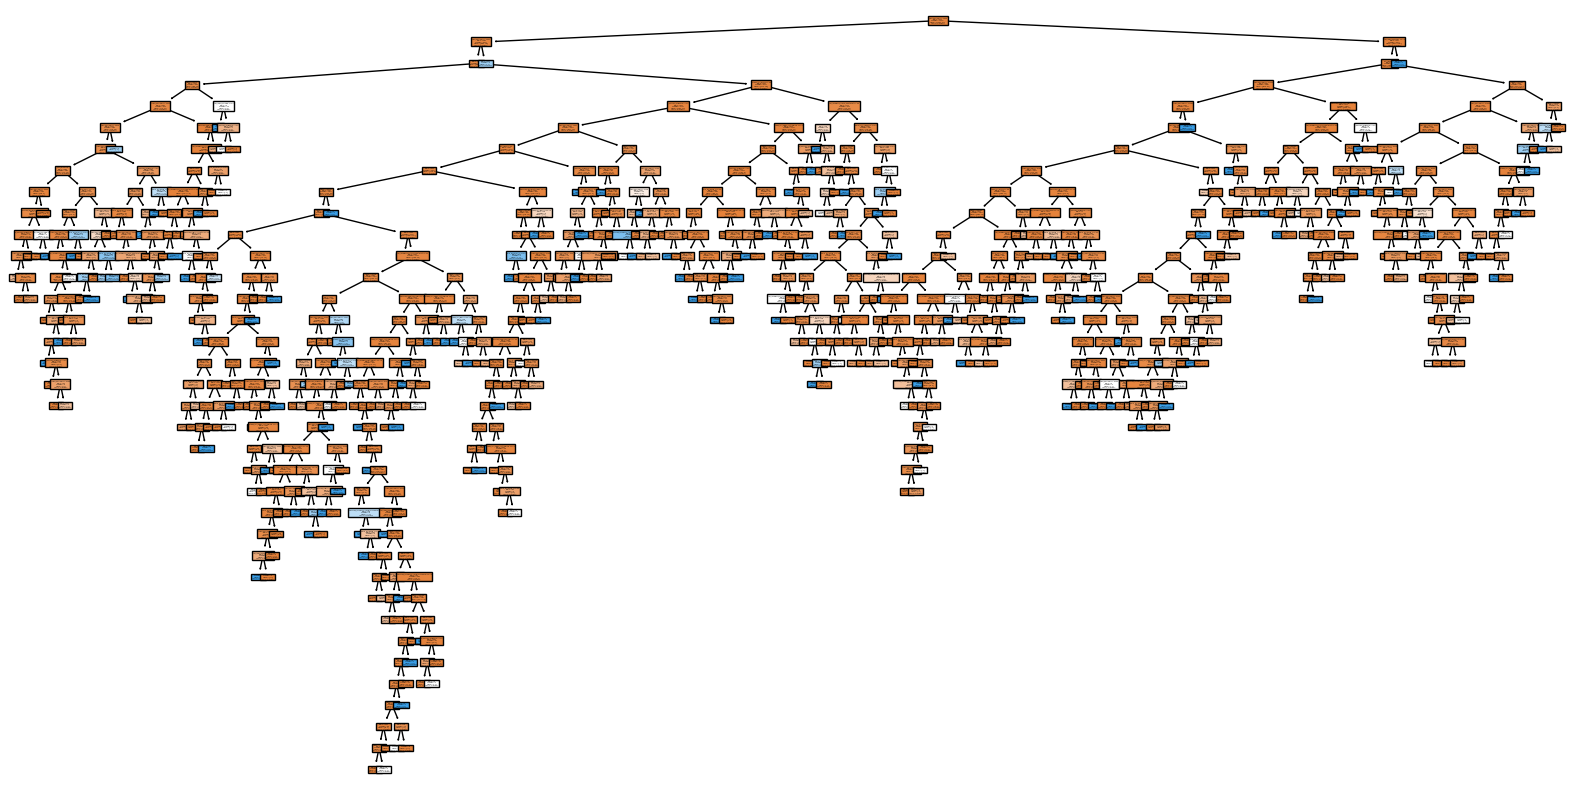

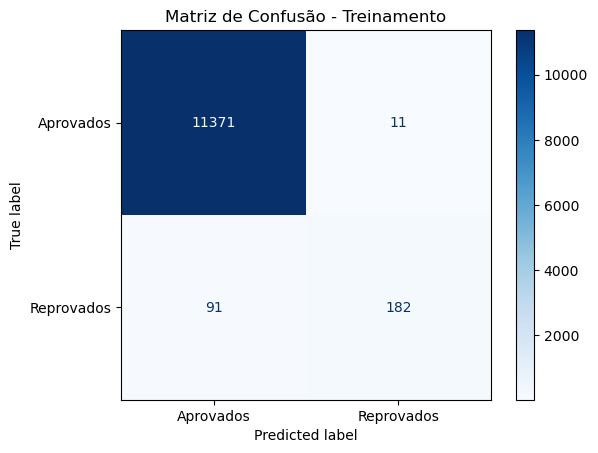

Acurácia na base de treinamento: 0.99


In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Definir o modelo de árvore de decisão
tree_model = DecisionTreeClassifier(random_state=123)
tree_model.fit(X_train, y_train)

# Visualizar a árvore
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Aprovados', 'Reprovados'], filled=True)
plt.show()

# Avaliar no conjunto de treinamento
y_train_pred = tree_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Matriz de confusão para o treinamento
conf_matrix_train = confusion_matrix(y_train, y_train_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(conf_matrix_train, display_labels=['Aprovados', 'Reprovados'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Treinamento")
plt.show()

print(f"Acurácia na base de treinamento: {train_acc:.2f}")

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

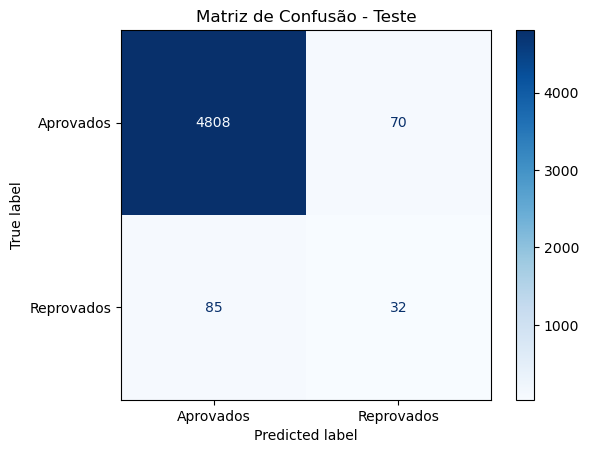

Acurácia na base de teste: 0.97


In [28]:
y_test_pred = tree_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

# Matriz de confusão para o teste
conf_matrix_test = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(conf_matrix_test, display_labels=['Aprovados', 'Reprovados'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Teste")
plt.show()

print(f"Acurácia na base de teste: {test_acc:.2f}")

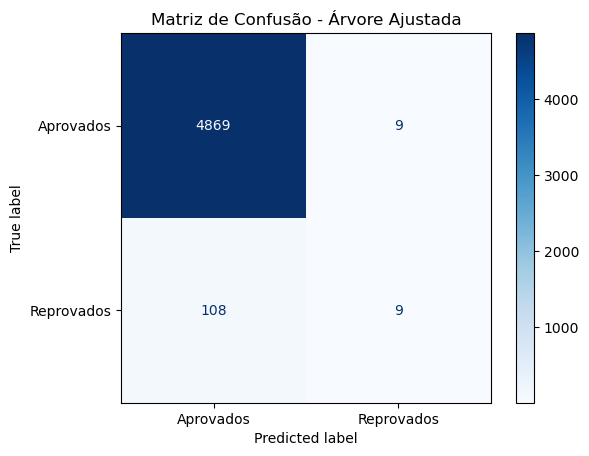

Proporção de maus classificados: 0.36%
Acurácia classificando todos como 'bons': 97.66%


In [31]:
adjusted_tree_model = DecisionTreeClassifier(
    min_samples_leaf=5, max_depth=10, random_state=123)
adjusted_tree_model.fit(X_train, y_train)

# Avaliar no conjunto de teste
y_test_pred_adj = adjusted_tree_model.predict(X_test)
adjusted_test_acc = accuracy_score(y_test, y_test_pred_adj)

# Matriz de confusão ajustada
conf_matrix_adj = confusion_matrix(y_test, y_test_pred_adj, labels=[0, 1])
disp = ConfusionMatrixDisplay(conf_matrix_adj, display_labels=['Aprovados', 'Reprovados'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Árvore Ajustada")
plt.show()

# Proporção de 'maus' classificados
maus_classificados = (y_test_pred_adj == 1).mean()
print(f"Proporção de maus classificados: {maus_classificados:.2%}")

# Acurácia se todos fossem classificados como 'bons'
todos_bons_acc = (y_test == 0).mean()
print(f"Acurácia classificando todos como 'bons': {todos_bons_acc:.2%}")